# Directorio de Proveedores y Contratistas sancionados (DSPC) - SFP 

## El número de Funcionarios Públicos sancionados por Dependencia de Gobierno son un indicador del posible nivel de corrupción de cada Dependencia.
## Esto se puede investigar al analizar las Causas de Sanción para Funcionario y cuantificar aquellas que pueden ser consideradas como Actos de Corrupción acorde a la ONU y como faltas a las Leyes Mexicanas.¶

##Importar data frame

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [8]:
df = pd.read_csv('proveedores1.csv',encoding = "iso-8859-16")

In [26]:
fd = pd.read_csv('sancionados.csv',encoding = "iso-8859-16")

# Exportar la base de los proveedores sancionados, con el fin de identificar quienes son las dependencias que mantienen una relacion con los provedores sancionados. 

In [10]:
df.head()

,proveedor,dependencia,numero de expediente,hechos de irregularidad,objeto social,sentido de resolucion,fecha de notificacion,fecha de resolucion,plazo,monto,nombre responsable de la informacion,fecha de actualizacion,Unnamed: 12
0,3R INNOVACIN Y DISEăO S.A. DE C.V.,\tINSTITUTO MEXICANO DEL SEGURO SOCIAL,\t0041/2013,\tLA EMPRESA POR CAUSAS IMPUTABLES A ELLA NO F...,\t3RINNOVACION@LIVE.COM.MX.,\tSANCIONATORIA CON MULTA,\t19/08/2014,\t06/08/2014,\t,\t90664.00,\tLIC. JORGE PERALTA PORRAS,\t06/12/2018 08:12,NaN
1,A AND P INTERNATIONAL,\tPEMEX GAS Y PETROQUIMICA BASICA,\t0002/2016,\tLO PREVISTO EN EL NUMERAL 59 FRACCIN III ...,\t,\tSANCIONATORIA CON MULTA E INHABILITACIN,\t06/12/2016,\t06/12/2016,\t4 AăOS,\t1.00,\t,\t06/12/2018 08:12,NaN
2,A Y M CONSTRUCTORA S.A. DE C.V.,\tSECRETARIA DE COMUNICACIONES Y TRANSPORTES,\t0121/2006,\tPRESENT INFORMACIN FALSA RESPECTO A ENCONT...,\t,\tSANCIONATORIA CON MULTA E INHABILITACIN,\t05/04/2007,\t23/03/2007,\t3 MESES,\t72540.00,\tHECTOR MANUEL MONTES GAYTAN,\t06/12/2018 08:12,NaN
3,A Y V INDUSTRIAL Y COMERCIAL S.A. DE C.V.,\tIII SERVICIOS S. A. DE C. V.,\t0001/2013,\tPRESENTACION DE DOCUMENTACION E INFORMACION ...,\tDISEăAR PROYECTAR PLANEAR ORGANIZAR ASES...,\tSANCIONATORIA CON MULTA E INHABILITACIN,\t08/05/2014,\t30/04/2014,\t3 MESES,\t133502.74,\tEDUARDO DE LA LUZ GARCA,\t06/12/2018 08:12,NaN
4,A&S CONSTRUCTION GROUP S.A. DE C.V.,\tADMINISTRACION PORTUARIA INTEGRAL DE DOS BOC...,\t0002/2017,\tPRESENT INFORMACIN FALSA RESPECTO A ENCONT...,\tREALIZACIN DE FLETES Y ACARREOS LOCALES Y ...,\tSANCIONATORIA CON MULTA E INHABILITACIN,\t24/10/2018,\t15/10/2018,\t3 MESES,\t113235.00,\tJOSÄ GUADALUPE FÄLIX DE LA CRUZ,\t06/12/2018 08:12,NaN


In [12]:
df.keys()

Index(['proveedor ', 'dependencia ', 'numero de expediente',
       'hechos de irregularidad', 'objeto social ', 'sentido de resolucion',
       'fecha de notificacion ', 'fecha de resolucion ', 'plazo ', 'monto ',
       'nombre responsable de la informacion ', 'fecha de actualizacion ',
       'Unnamed: 12'],
      dtype='object')

In [13]:
df['proveedor '].head()

0         3R INNOVACIN Y DISEăO  S.A. DE  C.V.
1                         A AND P INTERNATIONAL
2              A Y M CONSTRUCTORA  S.A. DE C.V.
3    A Y V INDUSTRIAL Y COMERCIAL  S.A. DE C.V.
4           A&S CONSTRUCTION GROUP S.A. DE C.V.
Name: proveedor , dtype: object

In [14]:
df['dependencia '].value_counts()

\tINSTITUTO MEXICANO DEL SEGURO SOCIAL                                          278
\tSECRETARIA DE LA FUNCIN PBLICA                                              193
\tCOMISION FEDERAL DE ELECTRICIDAD                                              176
\tPEMEX EXPLORACIN Y PRODUCCION                                                107
\tPEMEX GAS Y PETROQUIMICA BASICA                                                81
\tPEMEX PETROQUIMICA                                                             76
\tPEMEX REFINACION                                                               55
\tAEROPUERTOS Y SERVICIOS AUXILIARES                                             53
\tINSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES DE LOS TRABAJADORES DEL ESTADO     48
\tSECRETARIA DE LA DEFENSA NACIONAL                                              45
\tPETROLEOS MEXICANOS CORPORATIVO                                                35
\tSECRETARIA DE COMUNICACIONES Y TRANSPORTES                                

# Identificacion de los preveedores con mayor número de sanciones

In [15]:
df['proveedor '].value_counts()

MANTENIMIENTO CONSTRUCCIONES Y DESARROLLO INDUSTRIAL  S.A. DE C.V.                                      6
CONVERSIN E IMPRESIN LPEZ ORTZ  S.A. DE C.V.                                                        6
MUNDO MEDICO DEL NORTE  S.A. DE C.V.                                                                    6
C Y J CONSTRUCCIONES  S.A. DE C.V.                                                                      6
ERUCOYMA  S.A. DE C.V.                                                                                  5
SUNSET MEDICAL  S.A. DE C.V.                                                                            4
INTERNATIONAL SHOP KAISER  S.A. DE C.V.                                                                 4
MANTENIMIENTO CONSTRUCCIONES Y DESARROLLO INDUSTRIAL  S.A DE C.V.                                       4
ALUMOCLAD DE MÄXICO  S.A. DE C.V.                                                                       4
EJIDO HIPLITO RENTERA                       

# Proveedores o contratistas que fueron sancionados

<function matplotlib.pyplot.show(*args, **kw)>

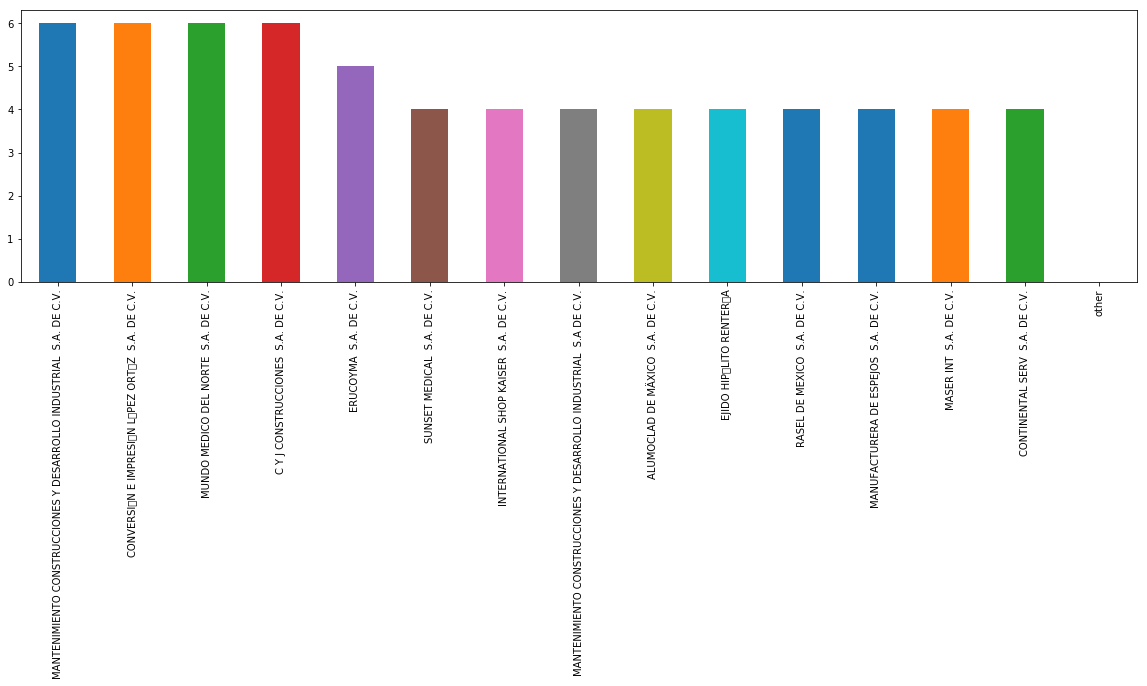

In [18]:
prob = df['proveedor '].value_counts()
plt.rcParams['figure.figsize'] = [20, 5]
treshold = 3
mask = prob > treshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = 0
prob.plot(kind = 'bar')
plt.show

# Histograma de las dependencias donde el proveedor cometio la irregularidad.

<function matplotlib.pyplot.show(*args, **kw)>

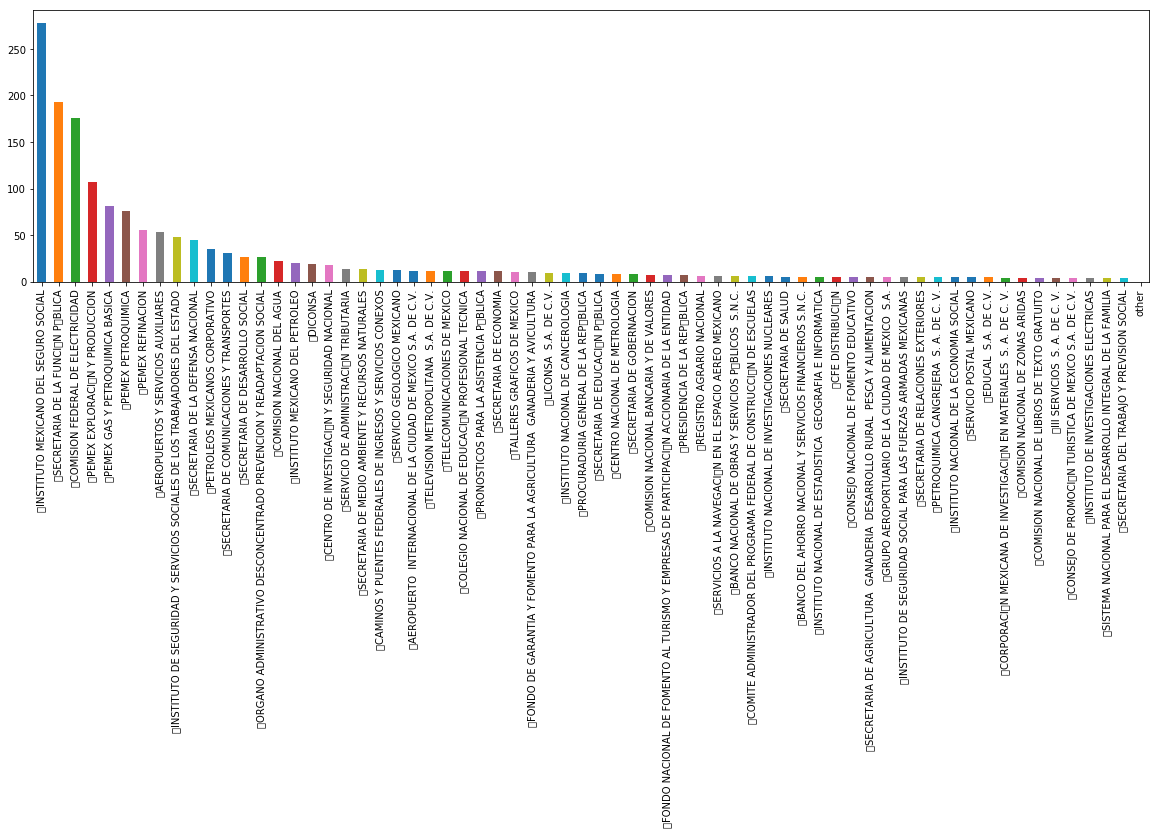

In [20]:
prob = df['dependencia '].value_counts()
plt.rcParams['figure.figsize'] = [20, 5]
treshold = 3
mask = prob > treshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = 0
prob.plot(kind = 'bar')
plt.show

# Motivo por el cual el proveedor o contratante fue sancionado. 
# Se encontro que la mayoria de los proveedores que mayor fueron sancionados es que se "Presenta información falsa respecto a sus obligaciones fiscales"

In [21]:
df['hechos de irregularidad'].describe()

count                                                  1764
unique                                                 1432
top       \tPRESENT INFORMACIN FALSA RESPECTO A ENCONT...
freq                                                    212
Name: hechos de irregularidad, dtype: object

In [22]:
df['hechos de irregularidad'].value_counts()

\tPRESENT INFORMACIN FALSA RESPECTO A ENCONTRARSE AL CORRIENTE DE SUS OBLIGACIONES FISCALES.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   212
\t                                                                                                                                                                                 

<function matplotlib.pyplot.show(*args, **kw)>

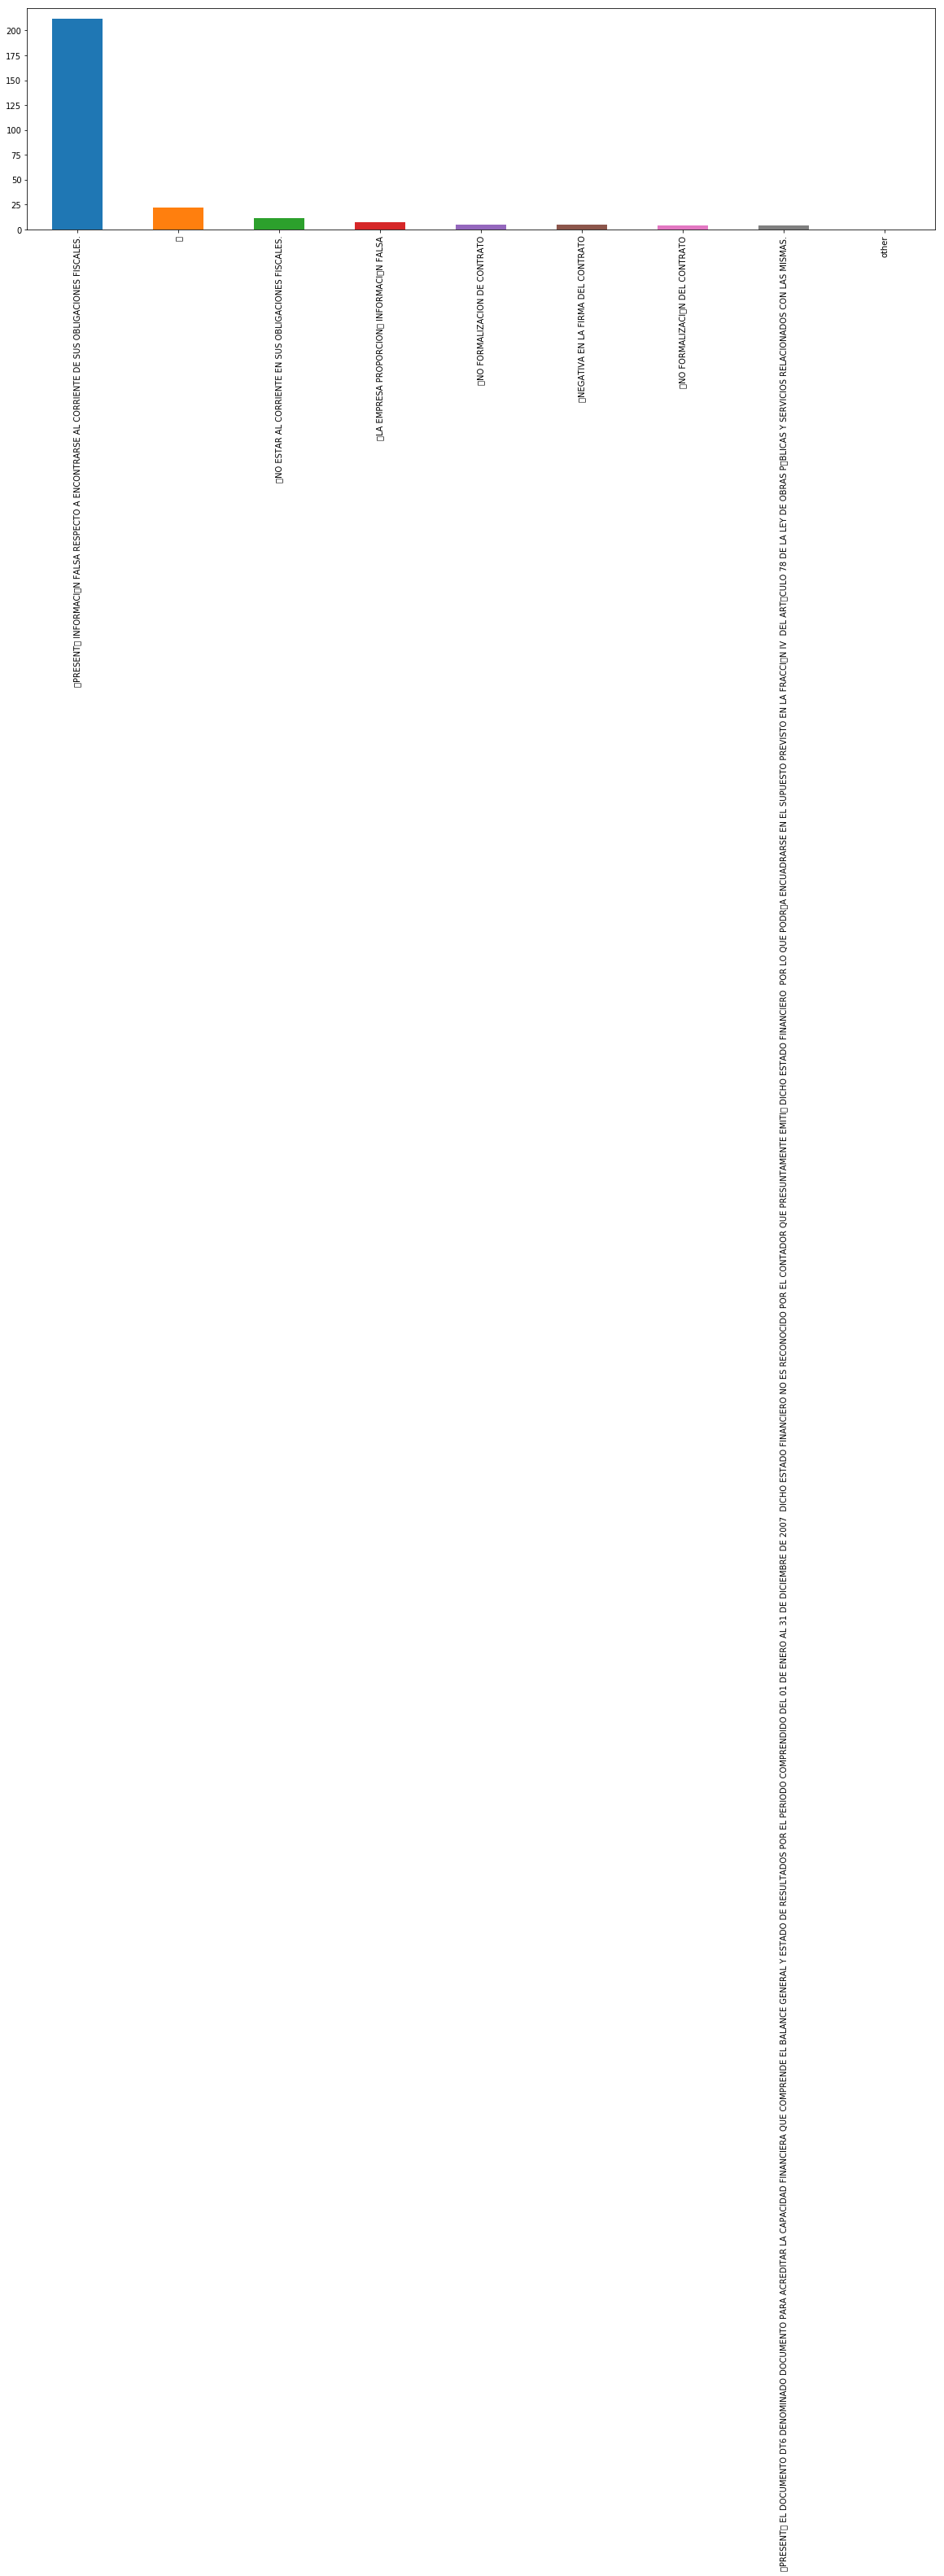

In [24]:
prob = df['hechos de irregularidad'].value_counts()
plt.rcParams['figure.figsize'] = [20, 5]
treshold = 3
mask = prob > treshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = 0
prob.plot(kind = 'bar')
plt.show

## Exporrancion de la base de funcionarios sancionados, para poder realizar un match entre dependencias


In [27]:
fd.head()

,expediente,fecha de resolucin,servidor publico,autoridad,dependencia,sancion impuesta,inicio,fin,monto,causa,Unnamed: 10
0,000001/2018,31/07/18,RAUL CARDOSO MONTILLA,ORGANO INTERNO DE CONTROL,INSTITUTO MEXICANO DEL PETROLEO,INHABILITACION ...,02/08/18,02/02/19,NaN,INCUMPLIMIENTO EN DECLARACION DE SITUACION PAT...,NaN
1,000003/2016,17/08/18,CIRILO VICTORIA RODRIGUEZ,ORGANO INTERNO DE CONTROL,INSTITUTO NACIONAL DE PEDIATRIA,INHABILITACION ...,31/08/18,31/08/23,NaN,NEGLIGENCIA ADMINISTRATIVA ...,NaN
2,000003/2016,17/08/18,GABRIEL DELGADO VALDIVIESO,ORGANO INTERNO DE CONTROL,INSTITUTO NACIONAL DE PEDIATRIA,INHABILITACION ...,29/08/18,29/08/23,NaN,NEGLIGENCIA ADMINISTRATIVA ...,NaN
3,000004/2017,14/11/18,ROBERTO MANUEL REYES GRANADOS,ORGANO INTERNO DE CONTROL,TALLERES GRAFICOS DE MEXICO,INHABILITACION ...,27/11/18,27/11/28,NaN,OTRAS ...,NaN
4,000004/2018,07/09/18,NAYELY YOLOTZIN CEDILLO NAJERA,ORGANO INTERNO DE CONTROL,INSTITUTO NACIONAL DE CANCEROLOGIA,INHABILITACION ...,07/09/18,07/12/18,NaN,OTRAS ...,NaN


In [28]:
fd["dependencia"].value_counts()

POLICIA FEDERAL                                                                 225
INSTITUTO MEXICANO DEL SEGURO SOCIAL (IMSS)                                     157
COMISION FEDERAL DE ELECTRICIDAD                                                131
SECRETARIA DE EDUCACION PUBLICA                                                 121
INSTITUTO NACIONAL DE MIGRACION                                                 120
TELECOMUNICACIONES DE MEXICO (TELECOMM)                                         113
INSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES DE LOS TRABAJADO                     85
SUPERISSSTE                                                                      84
ADMINISTRACION FEDERAL DE SERVICIOS EDUCATIVOS EN EL DISTRITO FEDERAL            83
FIDEICOMISO FONDO NACIONAL DE HABITACIONES POPULARES                             83
DICONSA. S.A. DE C.V                                                             62
COORDINACION NACIONAL DEL PROGRAMA DE DESARROLLO HUMANO OPORTUNIDADES       

In [30]:
df["dependencia "].value_counts()

\tINSTITUTO MEXICANO DEL SEGURO SOCIAL                                          278
\tSECRETARIA DE LA FUNCIN PBLICA                                              193
\tCOMISION FEDERAL DE ELECTRICIDAD                                              176
\tPEMEX EXPLORACIN Y PRODUCCION                                                107
\tPEMEX GAS Y PETROQUIMICA BASICA                                                81
\tPEMEX PETROQUIMICA                                                             76
\tPEMEX REFINACION                                                               55
\tAEROPUERTOS Y SERVICIOS AUXILIARES                                             53
\tINSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES DE LOS TRABAJADORES DEL ESTADO     48
\tSECRETARIA DE LA DEFENSA NACIONAL                                              45
\tPETROLEOS MEXICANOS CORPORATIVO                                                35
\tSECRETARIA DE COMUNICACIONES Y TRANSPORTES                                

# Dado que los valores no son enumerados el formato varia con los dataframe y es muy dificil realizar "match" entre ellos. Y por el tiempo reducido, el analisis de los datos se realizara de manera manual con los primeros 20 datos de ambas bases. 

# Con el objetivo de poder identificar las empresas 

In [ ]:
INSTITUTO MEXICANO DEL SEGURO SOCIAL (IMSS)                                     
COMISION FEDERAL DE ELECTRICIDAD                                               
SECRETARIA DE EDUCACION PUBLICA
INSTITUTO NACIONAL DE MIGRACION                                                 
TELECOMUNICACIONES DE MEXICO (TELECOMM)                                         
INSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES DE LOS TRABAJADO                     
DICONSA. S.A. DE C.V  
UNIDAD DE RESPONSABILIDADES EN PETRîLEOS MEXICANOS                              
COMISION NACIONAL DEL AGUA                                                       
PEMEX REFINACION                                                                 
ESTUDIOS CHURUBUSCO AZTECA S.A                                                   
COMISION NACIONAL FORESTAL                                                       
SECRETARIA DE DESARROLLO SOCIAL                                                  
                                                                                
